# **ĐỒ ÁN CUỐI KÌ DS301.**

GẮN NHẴN TỪ LOẠI TRÊN BỘ DỮ LIỆU VSLP NĂM 2013.

- Trong phần này chúng tôi sẽ xây dựng tập từ điển và ma trận embeding được xây dựng trước của word2vec dim 100.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PHẦN 1. Pre-trained Embedding và tạo bộ từ điển.

## 1.1 Đọc file word embedding.

- Tạo list từ điển.

In [ ]:
word_dict = []

embeddings_index = {}
embedding_dim = 100
max_feature = len(embeddings_index) + 2
f = open('/content/drive/MyDrive/Đồ Án DS310/Word_EmBedding/word2vec_vi_words_100dims.txt')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [ ]:
embeddings_index

{'1587507': array([100.], dtype=float32),
 ',': array([-0.01344502,  0.08291196,  0.09511289,  0.05249285,  0.06944065,
        -0.01065069,  0.00432103, -0.08282392,  0.05148022, -0.21759155,
        -0.09577844, -0.05494263, -0.0103271 ,  0.07735942,  0.04745318,
        -0.06621594, -0.13393909,  0.01582818, -0.12119   , -0.02294538,
        -0.09091333, -0.01343485,  0.10260719, -0.12268285, -0.05281042,
         0.00319954, -0.09995399, -0.11973237,  0.17736456, -0.04641574,
        -0.00445013,  0.12292004,  0.00212898,  0.07875178, -0.05953704,
        -0.00335201,  0.04510177,  0.03826997,  0.1008976 , -0.03324228,
         0.01321117, -0.06556378, -0.09131269, -0.02638779,  0.10684214,
         0.01374784,  0.04601299, -0.04713417,  0.1408092 , -0.00664291,
         0.01302393,  0.1144252 ,  0.04165214, -0.00536263,  0.03502455,
         0.04084913, -0.01474634,  0.02489359, -0.05261   , -0.08628976,
         0.0391279 , -0.17040002, -0.02041635, -0.07390592, -0.02549585,
    

In [ ]:
len(word_dict)

1587508

## 1.2. Tạo chỉ muc cho list từ điển.

In [ ]:
words = word_dict
num_words = len(words)+2
# Dictionary word:index pair
# word is key and its value is corresponding index
word2idx = {w : i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
# Dictionary lable:index pair
idx2word = {i: w for w, i in word2idx.items()}

## 1.3 Tạo ma trận embedding.

In [ ]:
import numpy as np
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word,i in word2idx.items():
    if  i> max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
print("Embeddings shape: {}".format(embedding_matrix.shape))

Embeddings shape: (1587510, 100)


In [ ]:
embeddings_index

{'1587507': array([100.], dtype=float32),
 ',': array([-0.01344502,  0.08291196,  0.09511289,  0.05249285,  0.06944065,
        -0.01065069,  0.00432103, -0.08282392,  0.05148022, -0.21759155,
        -0.09577844, -0.05494263, -0.0103271 ,  0.07735942,  0.04745318,
        -0.06621594, -0.13393909,  0.01582818, -0.12119   , -0.02294538,
        -0.09091333, -0.01343485,  0.10260719, -0.12268285, -0.05281042,
         0.00319954, -0.09995399, -0.11973237,  0.17736456, -0.04641574,
        -0.00445013,  0.12292004,  0.00212898,  0.07875178, -0.05953704,
        -0.00335201,  0.04510177,  0.03826997,  0.1008976 , -0.03324228,
         0.01321117, -0.06556378, -0.09131269, -0.02638779,  0.10684214,
         0.01374784,  0.04601299, -0.04713417,  0.1408092 , -0.00664291,
         0.01302393,  0.1144252 ,  0.04165214, -0.00536263,  0.03502455,
         0.04084913, -0.01474634,  0.02489359, -0.05261   , -0.08628976,
         0.0391279 , -0.17040002, -0.02041635, -0.07390592, -0.02549585,
    

#PHẦN 2: TIỀN XỬ LÝ DỮ LIỆU.

## Bước 1: Đọc dữ liệu.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import numpy as np
import requests
import seaborn as sns
np.random.seed(0)
plt.style.use("ggplot")
import tensorflow as tf

In [ ]:
# data_train.
df_train=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_train_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
# Đổi tên các cột.
df_train.columns = ('Words','Tags')


In [ ]:
# data_test.
df_test=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_test_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
df_test.columns = ('Words','Tags')


In [ ]:
# data_dev.
df_dev=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_dev_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
df_dev.columns = ('Words','Tags')


In [ ]:
df_train.head()

Words Tags
0  Hải_tặc    N
1  eo_biển    N
2  Malacca   Np
3        (   CH
4       kỳ    N

## Bước 2: Phân chia các câu.


### Vấn đề đặt ra.
Các câu sẽ được chia dựa vào xuống dòng để kết thúc mỗi câu. Vì vậy ta sẽ sử dụng hàm để gắn nhãn theo ý tưởng của hàm sau đây


In [ ]:
lis=[4,6,9]
def list_sentence(lis):
  arr=[0]
  x=0
  y=0
  for i in range(len(lis)):
    for j in range(int(lis[i]-y)):
      arr.append(x)
    x+=1
    y=lis[i]
  return arr

list_sentence(lis)

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2]

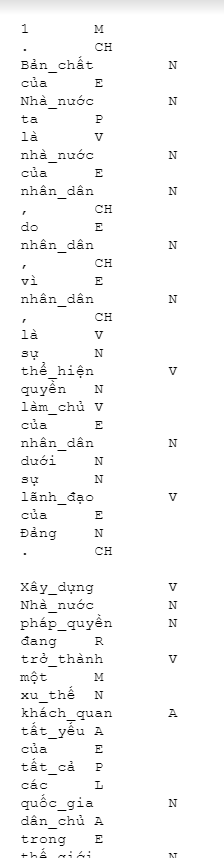

In [ ]:
df_test[20:40]

Words Tags
20       quyền    N
21     làm_chủ    V
22         của    E
23    nhân_dân    N
24        dưới    N
25          sự    N
26    lãnh_đạo    V
27         của    E
28        Đảng    N
29           .   CH
30         NaN  NaN
31    Xây_dựng    V
32    Nhà_nước    N
33  pháp_quyền    N
34        đang    R
35   trở_thành    V
36         một    M
37      xu_thế    N
38  khách_quan    A
39     tất_yếu    A

### Tiến hành xử lý gắn câu.

- Gắn câu cho tập train.

In [ ]:
# Tìm các index là NaN ở ô tags.
list_index=df_train[df_train['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_train['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_train.drop(list_index, inplace=True)

- Gắn câu cho tập dev.

In [ ]:
# Tìm các index là NaN ở ô tags.
list_index=df_dev[df_dev['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_dev['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_dev.drop(list_index, inplace=True)

- Gắn câu cho tập test.

In [ ]:
# Tìm các index là NaN ở ô tags.
list_index=df_test[df_test['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_test['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_test.drop(list_index, inplace=True)

In [ ]:
df_test

Words Tags  Sentences
0             1    M          0
1             .   CH          0
2      Bản_chất    N          0
3           của    E          0
4      Nhà_nước    N          0
...         ...  ...        ...
68460       vào    E       2119
68461  đời_sống    N       2119
68462  một_cách    R       2119
68463  hệ_thống    N       2119
68464         .   CH       2119

[66346 rows x 3 columns]

## Bước 3: Kiểm tra bộ dữ liệu.

In [ ]:
# Kiểm tra kích thước.
print(df_dev.shape)
print(df_test.shape)
print(df_train.shape)

(22823, 3)
(66346, 3)
(608960, 3)


### Xử lý sai sót.


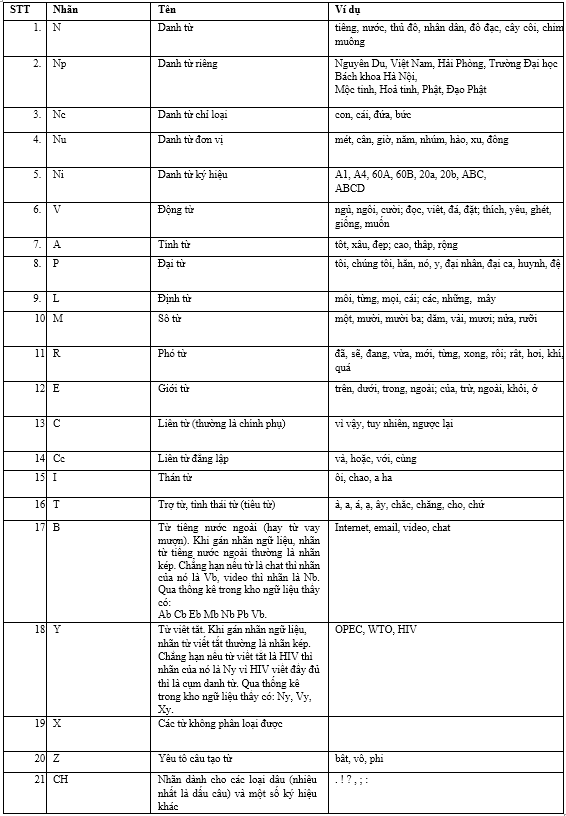

In [ ]:
# Kiểm tra số lượng nhãn.
print((df_dev['Tags'].nunique()))
print((df_test['Tags'].nunique()))
print((df_train['Tags'].nunique()))

20
21
32


Do ở tập test

- Chúng ta có trong phần mô tả là 21 nhãn của thuộc tính tags. Những phần nhãn 'Y' có thể được chia ra thành các nhãn nhỏ khác nhau vì thế ở tập train ta có tận 32 nhãn vì vậy chúng ta sẽ format lại về nhãn Y.

#### Xử lý tags trên tập train.

In [ ]:
# Kiểm tra nhãn tập train.
df_train['Tags'].unique()

array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C',
       'Ny', 'T', 'Nb', 'Y', 'Nu', 'Cc', 'Vb', 'I', 'X', 'Z', 'B', 'Eb',
       'Vy', 'Ab', ',', 'Cb', 'Mb', 'Pb', 'Ni', 'Xy'], dtype=object)

- Nhận thấy trong qua trình gắn nhãn bị sai ở cột tag.

In [ ]:
# Phát hiện sai nhãn ở tập train.
df_train.loc[df_train["Tags"]==',']

Words Tags  Sentences
89396     ,    ,       3897

- Do chỉ sai ở 1 ô và đây là dấu ',' vì thế ta sẽ gắn nhãn lại tag "CH" ở đây.

In [ ]:
df_train["Tags"].replace(',','CH',inplace=True)

- Bây giờ ta đã có một tập train gồm các tag đầy đủ.

In [ ]:
print((df_train['Tags'].nunique()))

31


In [ ]:
df_train['Tags'].unique()

array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C',
       'Ny', 'T', 'Nb', 'Y', 'Nu', 'Cc', 'Vb', 'I', 'X', 'Z', 'B', 'Eb',
       'Vy', 'Ab', 'Cb', 'Mb', 'Pb', 'Ni', 'Xy'], dtype=object)

- Format lại các tags.

In [ ]:
# format nhãn B.
df_train['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_train['Tags'].replace(['Ny', 'Vy','Xy'], 
                         ['Y','Y','Y'], inplace=True)

In [ ]:
print("Số nhãn tags trên tập train: ",df_train['Tags'].nunique())
df_train['Tags'].unique()

Số nhãn tags trên tập train:  21


array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C', 'Y',
       'T', 'B', 'Nu', 'Cc', 'I', 'X', 'Z', 'Ni'], dtype=object)

#### Kiểm tra trên 2 tập còn lại.

In [ ]:
# format nhãn B.
df_dev['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_dev['Tags'].replace(['Ny', 'Vy','Xy'], 
                         ['Y','Y','Y'], inplace=True)

# format nhãn B.
df_test['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_test['Tags'].replace(['Ny', 'Vy','Xy','NY'], 
                         ['Y','Y','Y','Y'], inplace=True)

In [ ]:
df_dev['Tags'].nunique()

19

In [ ]:
df_test['Tags'].unique()

array(['M', 'CH', 'N', 'E', 'P', 'V', 'R', 'A', 'L', 'Cc', 'X', 'Np',
       'Nc', 'C', 'T', 'Y', 'Ni', 'Z', 'I', 'Nu'], dtype=object)

- Kiểm tra lại cuối cùng.

In [ ]:
print((df_dev['Tags'].nunique()))
print((df_test['Tags'].nunique()))
print((df_train['Tags'].nunique()))

19
20
21


### Xử lý missing.

In [ ]:
df_train[df_train['Words'].isnull()]

Words Tags  Sentences
257911   NaN    N      11509
304459   NaN    N      13439
310763   NaN    N      13693
310930   NaN    N      13701

- Sau khi kiểm tra ở bộ dữ liệu. Ta nhận thấy có chút nhầm lẫn khi đọc dữ liệu ở đây là. Từ "nan" trong tiếng việt, ví dụ như "nan hoa", "nan tre" bị hiểu nhầm là giá trị null. Vì thế ta cần đổi lại cho phù hợp.

In [ ]:
df_dev=df_dev.fillna('nan')

In [ ]:
df_train=df_train.fillna('nan')

- Kiểm tra lại sau khi điền giá trị null.

In [ ]:
df_train.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

In [ ]:
df_dev.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

=> Dữ liệu đã ở dạng hoàn hảo.

## Bước 4: Lấy các câu theo các thẻ tương ứng.

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Words"].values.tolist(),
                                                           s["Tags"].values.tolist())]
        self.grouped = self.data.groupby("Sentences").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter_train = SentenceGetter(df_train)
getter_test = SentenceGetter(df_test)
getter_Dev = SentenceGetter(df_dev)
sentences_train = getter_train.sentences
sentences_test = getter_test.sentences
sentences_dev = getter_Dev.sentences

In [ ]:
# Thử đọc 1 câu.
sentences_train[0]

[('Hải_tặc', 'N'),
 ('eo_biển', 'N'),
 ('Malacca', 'Np'),
 ('(', 'CH'),
 ('kỳ', 'N'),
 ('1', 'M'),
 (')', 'CH'),
 (':', 'CH'),
 ('Eo_biển', 'N'),
 ('không', 'R'),
 ('yên_tĩnh', 'A'),
 ('...', 'CH')]

## Bước 5: Tạo danh sách word và tag dựa vào tập train và tập dev.

In [ ]:
print(words)
print(num_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tags_1 = list(set(df_train["Tags"].values))
tags_2 = list(set(df_dev["Tags"].values))
tags_3 = list(set(df_test["Tags"].values))
tags = list(set(tags_1+tags_2+tags_3))
num_tags = len(tags)
tags.append("ENDPAD")
tags.sort
print(tags)
print(num_tags)

['Nu', 'A', 'T', 'Cc', 'N', 'E', 'Ni', 'V', 'X', 'Z', 'M', 'L', 'Y', 'R', 'CH', 'I', 'B', 'P', 'C', 'Nc', 'Np', 'ENDPAD']
21


## Bước 6: Ánh xạ các từ và chỉ mục.

In [ ]:
tag2idx = {t: i for i, t in enumerate(tags)}
# word2idx
# word2idx["ENDPAD"]
tag2idx 

{'A': 1,
 'B': 16,
 'C': 18,
 'CH': 14,
 'Cc': 3,
 'E': 5,
 'ENDPAD': 21,
 'I': 15,
 'L': 11,
 'M': 10,
 'N': 4,
 'Nc': 19,
 'Ni': 6,
 'Np': 20,
 'Nu': 0,
 'P': 17,
 'R': 13,
 'T': 2,
 'V': 7,
 'X': 8,
 'Y': 12,
 'Z': 9}

## Bước 7: Padding đầu vào dữ liệu, Và mã hóa dữ liệu đầu ra.

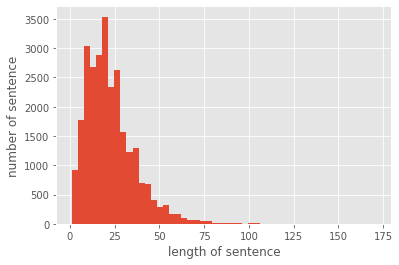

In [ ]:
plt.hist([len(s) for s in sentences_train], bins=50)
plt.xlabel("length of sentence")
plt.ylabel('number of sentence')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import  to_categorical
max_len = 75
NUM_LABEL = 3
# Xây dựng hàm mã hóa.
def encoding(data):
  X=[]
  for s in data:
    sent=[]
    for w in s:
      try:
        sent.append(word2idx[w[0]])
      except:
        sent.append(word2idx["UNK"])
    X.append(sent)

  X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)
  y=[[tag2idx[w[1]] for w in s] for s in data]
  y=pad_sequences(maxlen=max_len, sequences=y, padding="post",value=num_tags)
  y= to_categorical(y)
  return (X,y)

In [ ]:
X_train, y_train = encoding(sentences_train)
X_dev, y_dev = encoding(sentences_dev)
X_test, y_test = encoding(sentences_test)

In [ ]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_dev.shape))
print('Shape of output sequences: {}'.format(y_dev.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(y_test.shape))

TRAINING DATA
Shape of input sequences: (26999, 75)
Shape of output sequences: (26999, 75, 22)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (871, 75)
Shape of output sequences: (871, 75, 22)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (2120, 75)
Shape of output sequences: (2120, 75, 22)


# PHẦN 3: XÂY DỰNG MODEL POS TAGGING DỰA VÀO CÁC THUẬT TOÁN.

- Kiểm tra lại tập dữ liệu đầu vào và đầu ra.

## 1. Vanilla RNN

In [ ]:
# Khai báo thư viện.
from gensim.models import KeyedVectors
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

- Thông số mặc định.

In [ ]:
# So lượng của các tags.
NUM_CLASSES = (y_train.shape)[2]
MAX_SEQ_LENGTH=75
VOCABULARY_SIZE= len(words)+2
EMBEDDING_SIZE=100

- Build model.

In [ ]:
rnn_model = Sequential()

rnn_model.add(Input(shape=(MAX_SEQ_LENGTH,)))
# Tạo lớp embedding 
rnn_model.add(Embedding(input_dim     =  len(words)+2,         # vocabulary size - number of unique words in data
                        output_dim    =  100,          # Chiều của vector nhúng =1010.
                        input_length  =  MAX_SEQ_LENGTH,          # Độ dài của chuỗi đầu vào
                        weights       = [embedding_matrix], 
                        trainable     =  True                     # True - update the embeddings while training
))

# add an RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, 
              return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
))
# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

- Compile model.

In [ ]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()

rnn_model.compile(optimizer=optimizer, loss=loss,
metrics=['accuracy'])

In [ ]:
# check summary of the model
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 100)           158751000 
                                                                 
 simple_rnn (SimpleRNN)      (None, 75, 64)            10560     
                                                                 
 time_distributed (TimeDistr  (None, 75, 22)           1430      
 ibuted)                                                         
                                                                 
Total params: 158,762,990
Trainable params: 158,762,990
Non-trainable params: 0
_________________________________________________________________


- Fit model.

In [ ]:
import tensorflow as tf
with tf.device(tf.DeviceSpec(device_type='GPU',device_index="0")):
  rnn_history = rnn_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_dev,y_dev),
    batch_size= 128, 
    epochs=5,
    verbose=1
)

Epoch 1/5
211/211 [==============================] - 50s 221ms/step - loss: 0.2143 - accuracy: 0.9387 - val_loss: 0.0701 - val_accuracy: 0.9792
Epoch 2/5
211/211 [==============================] - 48s 229ms/step - loss: 0.0644 - accuracy: 0.9775 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 3/5
211/211 [==============================] - 46s 219ms/step - loss: 0.0539 - accuracy: 0.9807 - val_loss: 0.0686 - val_accuracy: 0.9789
Epoch 4/5
211/211 [==============================] - 46s 220ms/step - loss: 0.0469 - accuracy: 0.9832 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 5/5
211/211 [==============================] - 46s 219ms/step - loss: 0.0409 - accuracy: 0.9854 - val_loss: 0.0774 - val_accuracy: 0.9777


In [ ]:
rnn_model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 10ms/step - loss: 0.0949 - accuracy: 0.9705


[0.0948992446064949, 0.9705031514167786]

- Đồ thị học.

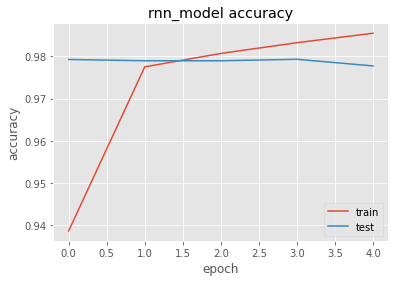

In [ ]:
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('rnn_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

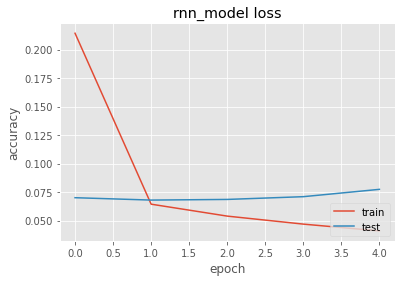

In [ ]:
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('rnn_model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

## 2.LSTM.

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim     = VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                         output_dim    = EMBEDDING_SIZE,          # length of vector with which each word is represented
                         input_length  = MAX_SEQ_LENGTH,          # length of input sequence
                         weights       = [embedding_matrix],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

- Compile model.

In [ ]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()

lstm_model.compile(optimizer=optimizer, loss=loss,
metrics=['accuracy'])

In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 75, 100)           158751000 
                                                                 
 lstm (LSTM)                 (None, 75, 64)            42240     
                                                                 
 time_distributed_1 (TimeDis  (None, 75, 22)           1430      
 tributed)                                                       
                                                                 
Total params: 158,794,670
Trainable params: 158,794,670
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_dev,y_dev),
    batch_size= 256, 
    epochs=5,
    verbose=1
)

Epoch 1/5
106/106 [==============================] - 20s 152ms/step - loss: 0.4418 - accuracy: 0.8803 - val_loss: 0.0907 - val_accuracy: 0.9746
Epoch 2/5
106/106 [==============================] - 16s 147ms/step - loss: 0.0811 - accuracy: 0.9737 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 3/5
106/106 [==============================] - 16s 147ms/step - loss: 0.0645 - accuracy: 0.9775 - val_loss: 0.0674 - val_accuracy: 0.9802
Epoch 4/5
106/106 [==============================] - 16s 147ms/step - loss: 0.0579 - accuracy: 0.9791 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 5/5
106/106 [==============================] - 16s 147ms/step - loss: 0.0532 - accuracy: 0.9806 - val_loss: 0.0685 - val_accuracy: 0.9793


- Đồ thị học.

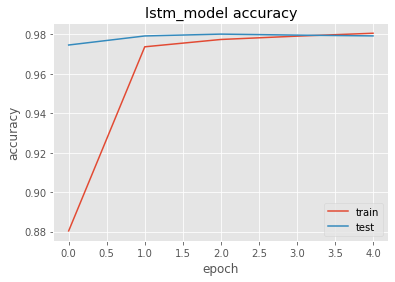

In [ ]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('lstm_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

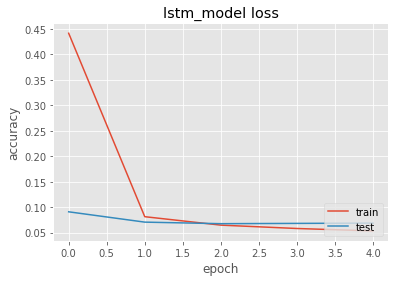

In [ ]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:
lstm_model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 7ms/step - loss: 0.0826 - accuracy: 0.9733


[0.08255496621131897, 0.9732893109321594]

## 3. GRU.

In [ ]:
# create architecture

gru_model = Sequential()
gru_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                        output_dim    = EMBEDDING_SIZE,
                        input_length  = MAX_SEQ_LENGTH,
                        weights       = [embedding_matrix],
                        trainable     = True
))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

optimizer = Adam(learning_rate=0.1)
loss = CategoricalCrossentropy()

gru_model.compile(optimizer=optimizer, loss=loss,
metrics=['accuracy'])

gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 75, 100)           158751000 
                                                                 
 gru (GRU)                   (None, 75, 64)            31872     
                                                                 
 time_distributed_2 (TimeDis  (None, 75, 22)           1430      
 tributed)                                                       
                                                                 
Total params: 158,784,302
Trainable params: 158,784,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_history = gru_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_dev,y_dev),
    batch_size= 256, 
    epochs=5,
    verbose=1
)

Epoch 1/5
106/106 [==============================] - 18s 151ms/step - loss: 0.2602 - accuracy: 0.9269 - val_loss: 0.0895 - val_accuracy: 0.9753
Epoch 2/5
106/106 [==============================] - 15s 145ms/step - loss: 0.0897 - accuracy: 0.9713 - val_loss: 0.0846 - val_accuracy: 0.9749
Epoch 3/5
106/106 [==============================] - 15s 145ms/step - loss: 0.0813 - accuracy: 0.9730 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 4/5
106/106 [==============================] - 15s 146ms/step - loss: 0.0777 - accuracy: 0.9739 - val_loss: 0.0824 - val_accuracy: 0.9767
Epoch 5/5
106/106 [==============================] - 15s 145ms/step - loss: 0.0752 - accuracy: 0.9744 - val_loss: 0.0860 - val_accuracy: 0.9762


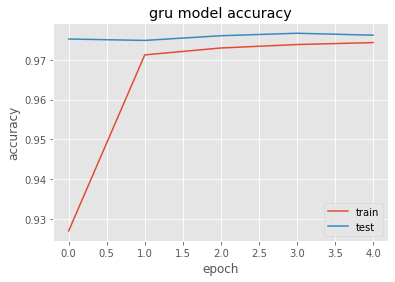

In [ ]:
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('gru model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

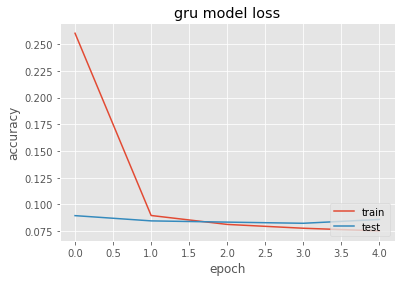

In [ ]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('gru model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

## 4. Bidircectional LSTM.

In [ ]:
# create architecture

bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim     = 1587510,
                             output_dim    = 100,
                             input_length  = 75,
                             weights       = [embedding_matrix],
                             trainable     = True
))
bidirect_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [ ]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()

bidirect_model.compile(optimizer=optimizer, loss=loss,
metrics=['accuracy'])

In [ ]:
# check summary of model
bidirect_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 75, 100)           158751000 
                                                                 
 bidirectional (Bidirectiona  (None, 75, 128)          84480     
 l)                                                              
                                                                 
 time_distributed_3 (TimeDis  (None, 75, 22)           2838      
 tributed)                                                       
                                                                 
Total params: 158,838,318
Trainable params: 158,838,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bidirect_history= bidirect_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_dev,y_dev),
    batch_size= 128, 
    epochs=5,
    verbose=1)

Epoch 1/5
211/211 [==============================] - 38s 161ms/step - loss: 0.2334 - accuracy: 0.9331 - val_loss: 0.0641 - val_accuracy: 0.9798
Epoch 2/5
211/211 [==============================] - 33s 156ms/step - loss: 0.0596 - accuracy: 0.9796 - val_loss: 0.0588 - val_accuracy: 0.9820
Epoch 3/5
211/211 [==============================] - 33s 156ms/step - loss: 0.0480 - accuracy: 0.9832 - val_loss: 0.0643 - val_accuracy: 0.9805
Epoch 4/5
211/211 [==============================] - 33s 156ms/step - loss: 0.0409 - accuracy: 0.9856 - val_loss: 0.0647 - val_accuracy: 0.9816
Epoch 5/5
211/211 [==============================] - 33s 156ms/step - loss: 0.0346 - accuracy: 0.9878 - val_loss: 0.0649 - val_accuracy: 0.9814


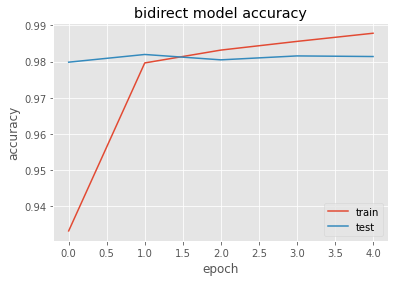

In [ ]:
plt.plot(bidirect_history.history['accuracy'])
plt.plot(bidirect_history.history['val_accuracy'])
plt.title('bidirect model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

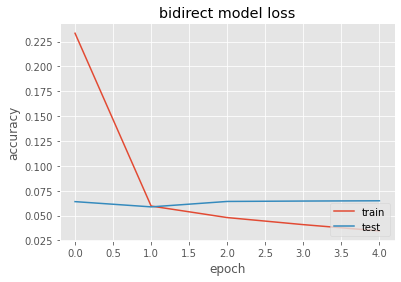

In [ ]:
plt.plot(bidirect_history.history['loss'])
plt.plot(bidirect_history.history['val_loss'])
plt.title('bidirect model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

# PHẦN 4: ĐÁNH GIÁ MÔ HÌNH.

## 1.Xây dựng các hàm cần thiết.

In [ ]:
# Hàm dự đoán tagging trên 1 câu.
def pred_sentences(model,i):
  p = model.predict(np.array([X_test[i]]))
  p = np.argmax(p, axis=-1)
  y_true = np.argmax(y_test[i], axis=-1)
  print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
  print("-" *30)
  for w, true, pred in zip(X_test[i], y_true, p[0]):
      print("{:15}{}\t{}".format(words[w], tags[true], tags[pred]))

In [ ]:
# Hàm xuất ra giá trị thức tế và giá trị dữ đoán.
def Out_put(model):
  y_test_padding=[]
  y_pred_padding=[]
  for i in range(len(X_test)):
    p = model.predict(np.array([X_test[i]]))
    p = np.argmax(p, axis=-1)
    y_true = np.argmax(y_test[i], axis=-1)
    p=list(p.reshape(-1,))
    y_true=list(y_true.reshape(-1,))

    y_test_padding+=y_true
    y_pred_padding+=p

  return y_test_padding,y_pred_padding

In [ ]:
def Matrix(y_true,y_pred,title='Confusion_matris'):
  from sklearn.metrics import confusion_matrix
  array=confusion_matrix(y_true,y_pred)

  df_cm = pd.DataFrame(array)
  fig,ax =plt.subplots(figsize=(30,15))
  cmap=sns.diverging_palette(0,230,90,60,
    as_cmap=True)
  sns.heatmap(df_cm, annot=True,cmap=cmap,linecolor='black',linewidths=1,annot_kws={"fontsize":10})
  ytick =[i.upper() for i in list_labels]
  xick =[i.upper() for i in list_labels]

  ax.set_yticklabels(ytick, rotation =0);
  ax.set_xticklabels(xick, rotation =0);
  ax.set_title(title,fontsize=18);

  plt.show()

In [ ]:
def Measure(y_true,y_pred):
  from sklearn.metrics import classification_report
  from sklearn.metrics import f1_score
  print("Độ đo f1 trên toàn bộ tập dữ liêu:")
  print("Micro : ",f1_score(y_true,y_pred , average='micro'))
  print("Macro : ",f1_score(y_true,y_pred, average='macro')) 

  print(classification_report(y_true,y_pred,target_names=list_labels))

In [ ]:
def acc(y_test_padding,y_pred_padding):

  for i in range(len(list_labels)):
    count_test =0
    for y in y_test_padding:
      if y == i:
        count_test+=1

    count_pred =0
    for y in y_pred_padding:
      if y == i:
        count_pred+=1
    if count_test==0:
      print(list_labels[i]+":"+'0')
    else:
      print(list_labels[i]+":"+str(float(count_pred)/count_test))

In [ ]:
# sort các tags theo index
list_sort= sorted(tag2idx.items(), key=lambda kv: kv[1])
list_labels = []
for i in list_sort:
    list_labels.append(i[0])


## 2. RNN_Model.

In [ ]:
a = rnn_model.evaluate(X_test,y_test)
print("Kết quả loss cuối cùng: ",a[0])
print("Kết quả accuracy cuối cùng: ",a[1])

67/67 [==============================] - 1s 11ms/step - loss: 0.0949 - accuracy: 0.9705
Kết quả loss cuối cùng:  0.0948992446064949
Kết quả accuracy cuối cùng:  0.9705031514167786


In [ ]:
X_rnn,y_rnn = Out_put(rnn_model)

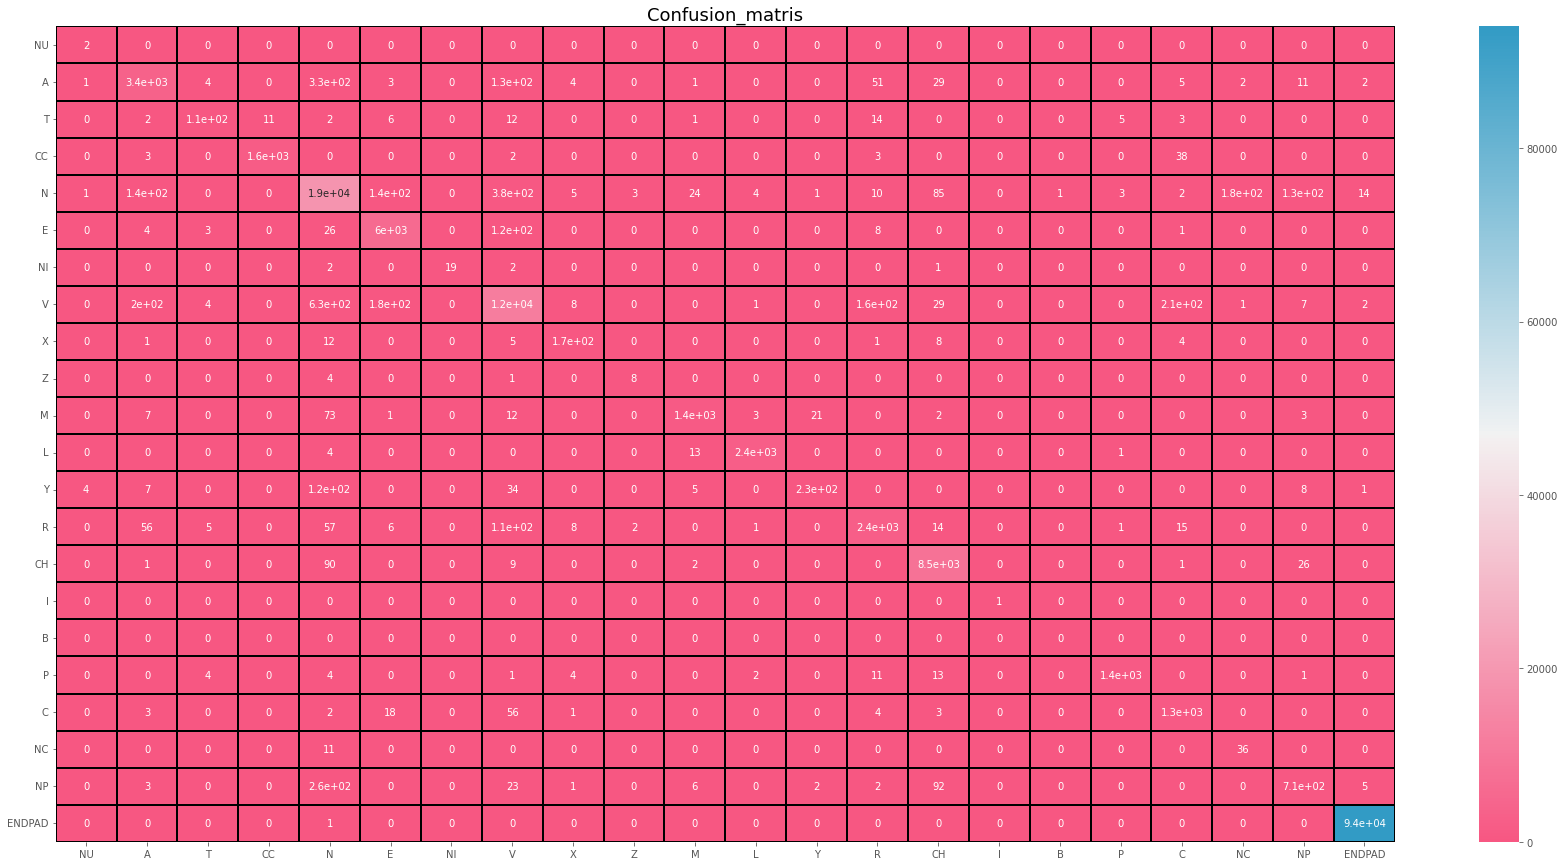

In [ ]:
Matrix(X_rnn,y_rnn)

In [ ]:
Measure(X_rnn,y_rnn)

Độ đo f1 trên toàn bộ tập dữ liêu:
Micro :  0.970503144654088
Macro :  0.7944545973072742
              precision    recall  f1-score   support

          Nu       0.25      1.00      0.40         2
           A       0.89      0.86      0.87      3960
           T       0.84      0.66      0.74       163
          Cc       0.99      0.97      0.98      1661
           N       0.92      0.94      0.93     20011
           E       0.94      0.97      0.96      6144
          Ni       1.00      0.79      0.88        24
           V       0.93      0.89      0.91     13324
           X       0.85      0.85      0.85       202
           Z       0.62      0.62      0.62        13
           M       0.96      0.92      0.94      1475
           L       1.00      0.99      0.99      2406
           Y       0.91      0.57      0.70       412
           R       0.90      0.90      0.90      2634
          CH       0.97      0.99      0.98      8609
           I       1.00      1.00      1.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc(X_rnn,y_rnn)

Nu:4.0
A:0.9628787878787879
T:0.7791411042944786
Cc:0.9789283564118001
N:1.0248863125281096
E:1.0310872395833333
Ni:0.7916666666666666
V:0.9597718402882017
X:1.0
Z:1.0
M:0.9525423728813559
L:0.9970906068162926
Y:0.6237864077669902
R:0.9950645406226272
CH:1.0170751539087002
I:1.0
B:0
P:0.9785714285714285
C:1.1403636363636365
Nc:4.76595744680851
Np:0.8170289855072463
ENDPAD:1.0002445949826124


## 3. LSTM_Model.

In [ ]:
b = lstm_model.evaluate(X_test,y_test)
print("Kết quả loss cuối cùng: ",b[0])
print("Kết quả accuracy cuối cùng: ",b[1])

67/67 [==============================] - 1s 8ms/step - loss: 0.0826 - accuracy: 0.9733
Kết quả loss cuối cùng:  0.08255496621131897
Kết quả accuracy cuối cùng:  0.9732893109321594


In [ ]:
list_sort= sorted(tag2idx.items(), key=lambda kv: kv[1])
list_labels = []
for i in list_sort:
    list_labels.append(i[0])

In [ ]:
X_lstm,y_lstm = Out_put(lstm_model)

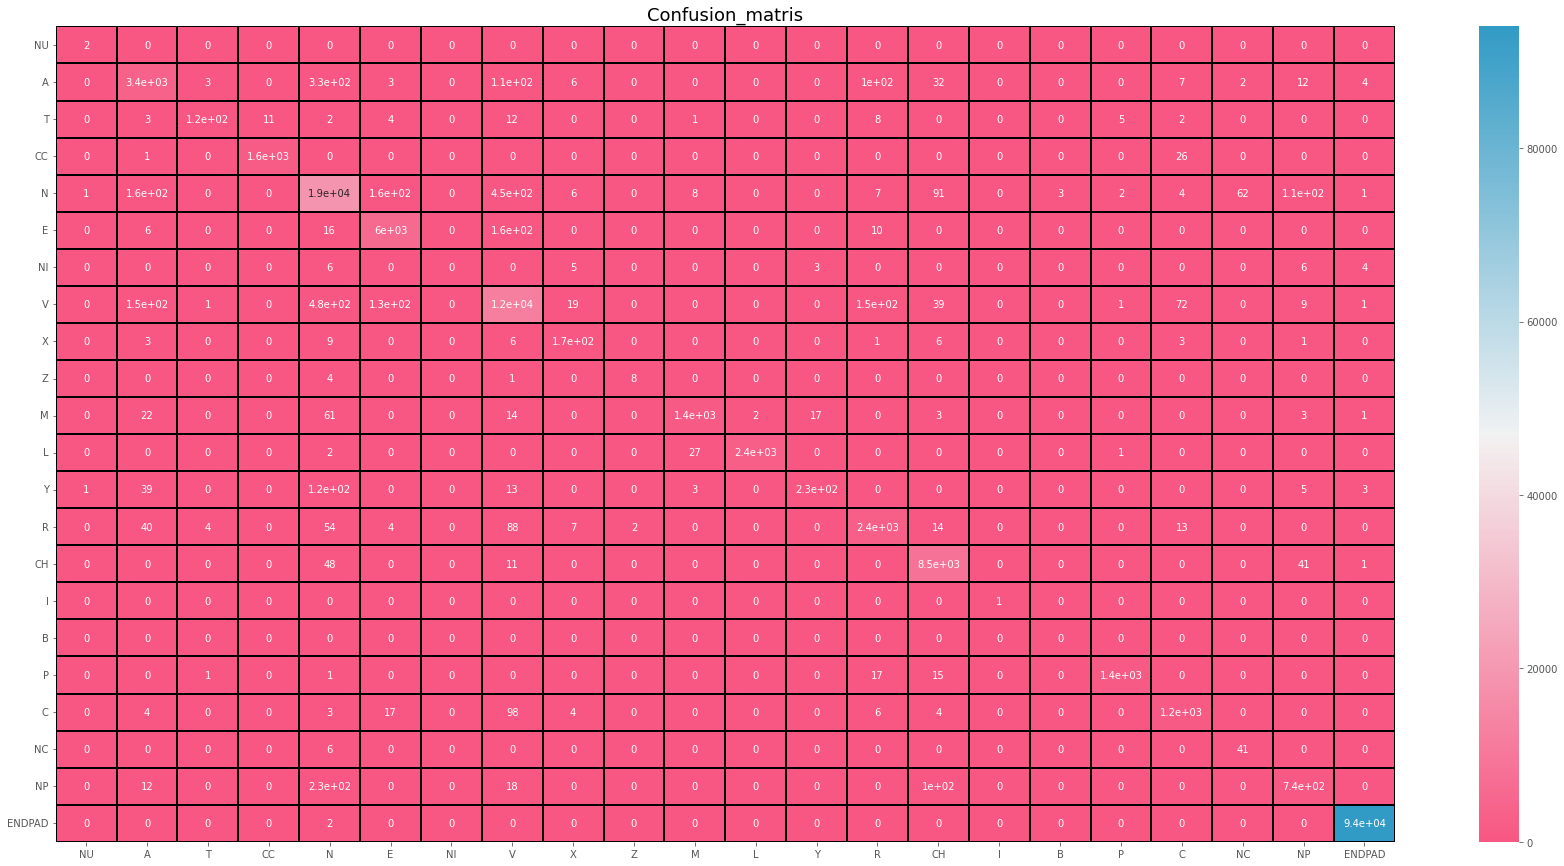

In [ ]:
Matrix(X_lstm,y_lstm)

In [ ]:
Measure(X_lstm,y_lstm)

Độ đo f1 trên toàn bộ tập dữ liêu:
Micro :  0.9732893081761006
Macro :  0.7877946005947366
              precision    recall  f1-score   support

          Nu       0.50      1.00      0.67         2
           A       0.88      0.85      0.87      3960
           T       0.93      0.71      0.80       163
          Cc       0.99      0.98      0.99      1661
           N       0.93      0.95      0.94     20011
           E       0.95      0.97      0.96      6144
          Ni       0.00      0.00      0.00        24
           V       0.93      0.92      0.92     13324
           X       0.79      0.86      0.82       202
           Z       0.80      0.62      0.70        13
           M       0.97      0.92      0.94      1475
           L       1.00      0.99      0.99      2406
           Y       0.92      0.56      0.70       412
           R       0.89      0.91      0.90      2634
          CH       0.97      0.99      0.98      8609
           I       1.00      1.00      1.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
acc(X_lstm,y_lstm)

Nu:2.0
A:0.9563131313131313
T:0.7607361963190185
Cc:0.9903672486453944
N:1.0153915346559392
E:1.0201822916666667
Ni:0.0
V:0.9946712698889223
X:1.0891089108910892
Z:0.7692307692307693
M:0.9430508474576271
L:0.9883624272651704
Y:0.6116504854368932
R:1.0277145026575552
CH:1.0238122894645139
I:1.0
B:0
P:0.9821428571428571
C:0.9934545454545455
Nc:2.234042553191489
Np:0.8442028985507246
ENDPAD:1.0001382493379984


In [ ]:
pred_sentences(rnn_model,3)

Word           True 	 Pred

------------------------------
vòng           E	E
xôn_xao        N	N
có             V	V
người          M	M
Khoa_học       N	N
tài_sản        V	V
MU             N	N
mời            N	N
là             Cc	Cc
MU             N	N
cảnh_sát       N	N
và             CH	CH
khẳng_định     N	N
các            E	E
chuẩn_bị       N	N
béo_bở         N	N
ông            R	R
chiến_sĩ       V	V
tại            E	E
này            L	L
chuyện         N	N
mời            N	N
và             CH	CH
luôn           N	N
vào            CH	CH
chương_trình   N	N
là             Cc	Cc
thấp           N	N
đất_nước       A	A
các            E	E
tham_gia       L	L
mới            N	N
và             CH	CH
việc           V	V
Theo           V	C
chia           N	N
phì            A	A
và             CH	CH
Vietnam        A	A
các            E	E
chuẩn_bị       N	N
béo_bở         N	N
:              E	E
tham_gia       L	M
quản_lý        N	N
của            CH	CH
1587507        ENDPAD	ENDPAD
1587507        ENDPAD	

## 4. GRU_Model.

In [ ]:
c = gru_model.evaluate(X_test,y_test)
print("Kết quả loss cuối cùng: ",c[0])
print("Kết quả accuracy cuối cùng: ",c[1])

67/67 [==============================] - 1s 8ms/step - loss: 0.1041 - accuracy: 0.9688
Kết quả loss cuối cùng:  0.10405336320400238
Kết quả accuracy cuối cùng:  0.9688239097595215


In [ ]:
X_gru,y_gru = Out_put(gru_model)

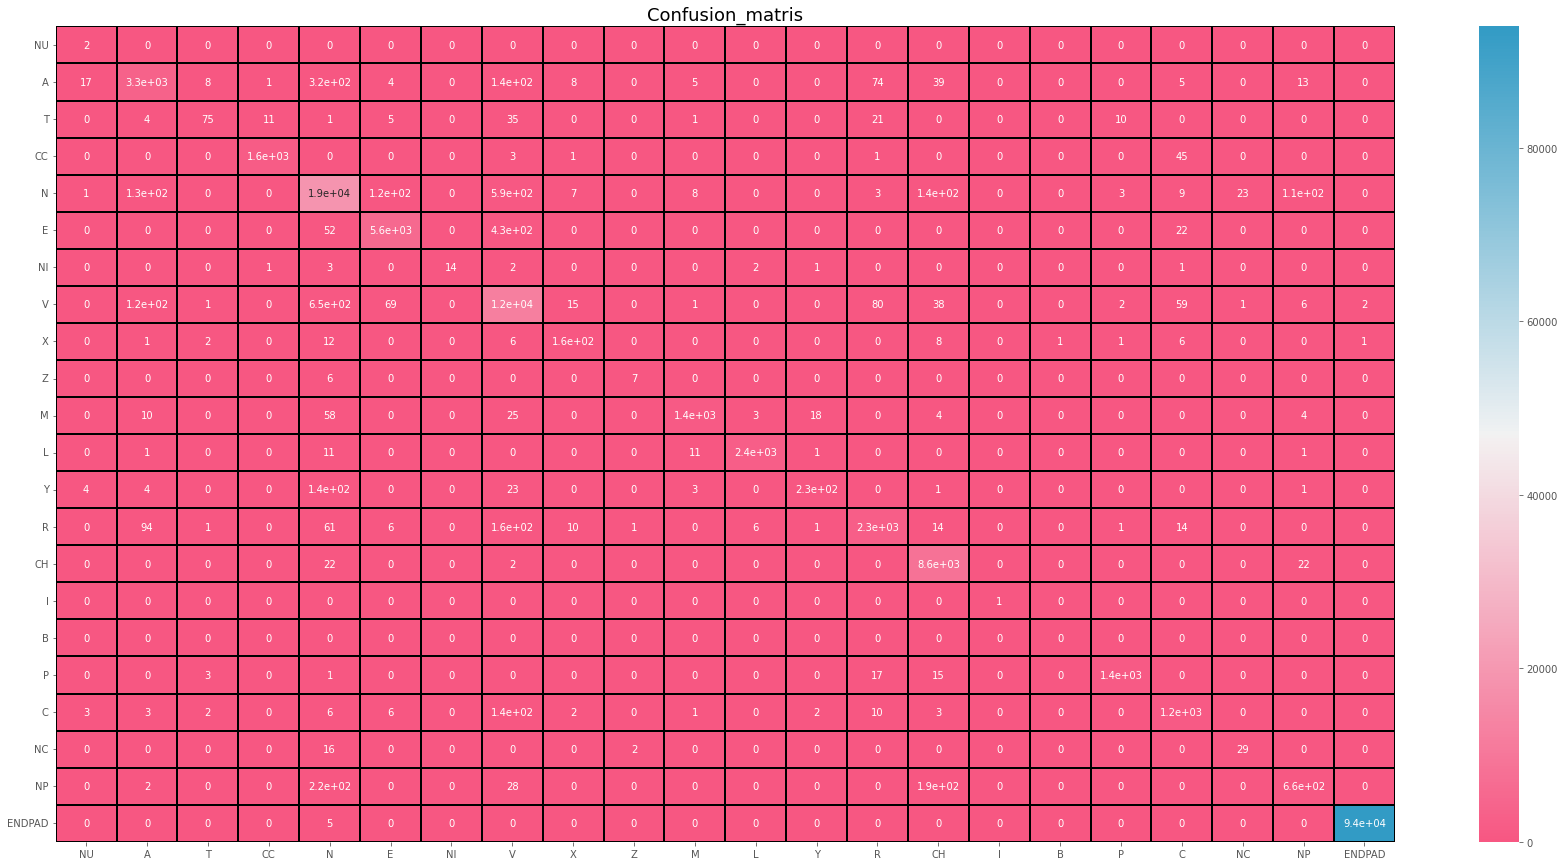

In [ ]:
Matrix(X_gru,y_gru)

In [ ]:
Measure(X_gru,y_gru)

Độ đo f1 trên toàn bộ tập dữ liêu:
Micro :  0.9688238993710692
Macro :  0.7779427857298462
              precision    recall  f1-score   support

          Nu       0.07      1.00      0.14         2
           A       0.90      0.84      0.87      3960
           T       0.82      0.46      0.59       163
          Cc       0.99      0.97      0.98      1661
           N       0.92      0.94      0.93     20011
           E       0.96      0.92      0.94      6144
          Ni       1.00      0.58      0.74        24
           V       0.89      0.92      0.90     13324
           X       0.79      0.81      0.80       202
           Z       0.70      0.54      0.61        13
           M       0.98      0.92      0.95      1475
           L       1.00      0.99      0.99      2406
           Y       0.91      0.57      0.70       412
           R       0.92      0.86      0.89      2634
          CH       0.95      0.99      0.97      8609
           I       1.00      1.00      1.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc(X_gru,y_gru)

Nu:13.5
A:0.9318181818181818
T:0.5644171779141104
Cc:0.9777242624924745
N:1.0220378791664584
E:0.9523111979166666
Ni:0.5833333333333334
V:1.0413539477634344
X:1.0247524752475248
Z:0.7692307692307693
M:0.9376271186440678
L:0.9941812136325852
Y:0.6213592233009708
R:0.9384965831435079
CH:1.0479730514577767
I:1.0
B:0
P:0.9864285714285714
C:0.9847272727272727
Nc:1.127659574468085
Np:0.7355072463768116
ENDPAD:0.9999787308710771


In [ ]:
pred_sentences(gru_model,3)

Word           True 	 Pred

------------------------------
vòng           E	E
xôn_xao        N	N
có             V	V
người          M	M
Khoa_học       N	N
tài_sản        V	V
MU             N	N
mời            N	N
là             Cc	Cc
MU             N	N
cảnh_sát       N	N
và             CH	CH
khẳng_định     N	N
các            E	E
chuẩn_bị       N	N
béo_bở         N	N
ông            R	R
chiến_sĩ       V	V
tại            E	E
này            L	L
chuyện         N	N
mời            N	N
và             CH	CH
luôn           N	N
vào            CH	CH
chương_trình   N	N
là             Cc	Cc
thấp           N	N
đất_nước       A	A
các            E	E
tham_gia       L	L
mới            N	N
và             CH	CH
việc           V	V
Theo           V	C
chia           N	N
phì            A	A
và             CH	CH
Vietnam        A	A
các            E	E
chuẩn_bị       N	N
béo_bở         N	N
:              E	E
tham_gia       L	L
quản_lý        N	N
của            CH	CH
1587507        ENDPAD	ENDPAD
1587507        ENDPAD	

## 5. Bidirectional_Model.

In [ ]:
d = bidirect_model.evaluate(X_test,y_test)
print("Kết quả loss cuối cùng: ",d[0])
print("Kết quả accuracy cuối cùng: ",d[1])

67/67 [==============================] - 1s 13ms/step - loss: 0.0815 - accuracy: 0.9759
Kết quả loss cuối cùng:  0.08154745399951935
Kết quả accuracy cuối cùng:  0.9759308099746704


In [ ]:
X_bidirect,y_bidirect = Out_put(bidirect_model)

In [ ]:
# sort các tags theo index
list_sort= sorted(tag2idx.items(), key=lambda kv: kv[1])
list_labels = []
for i in list_sort:
    list_labels.append(i[0])


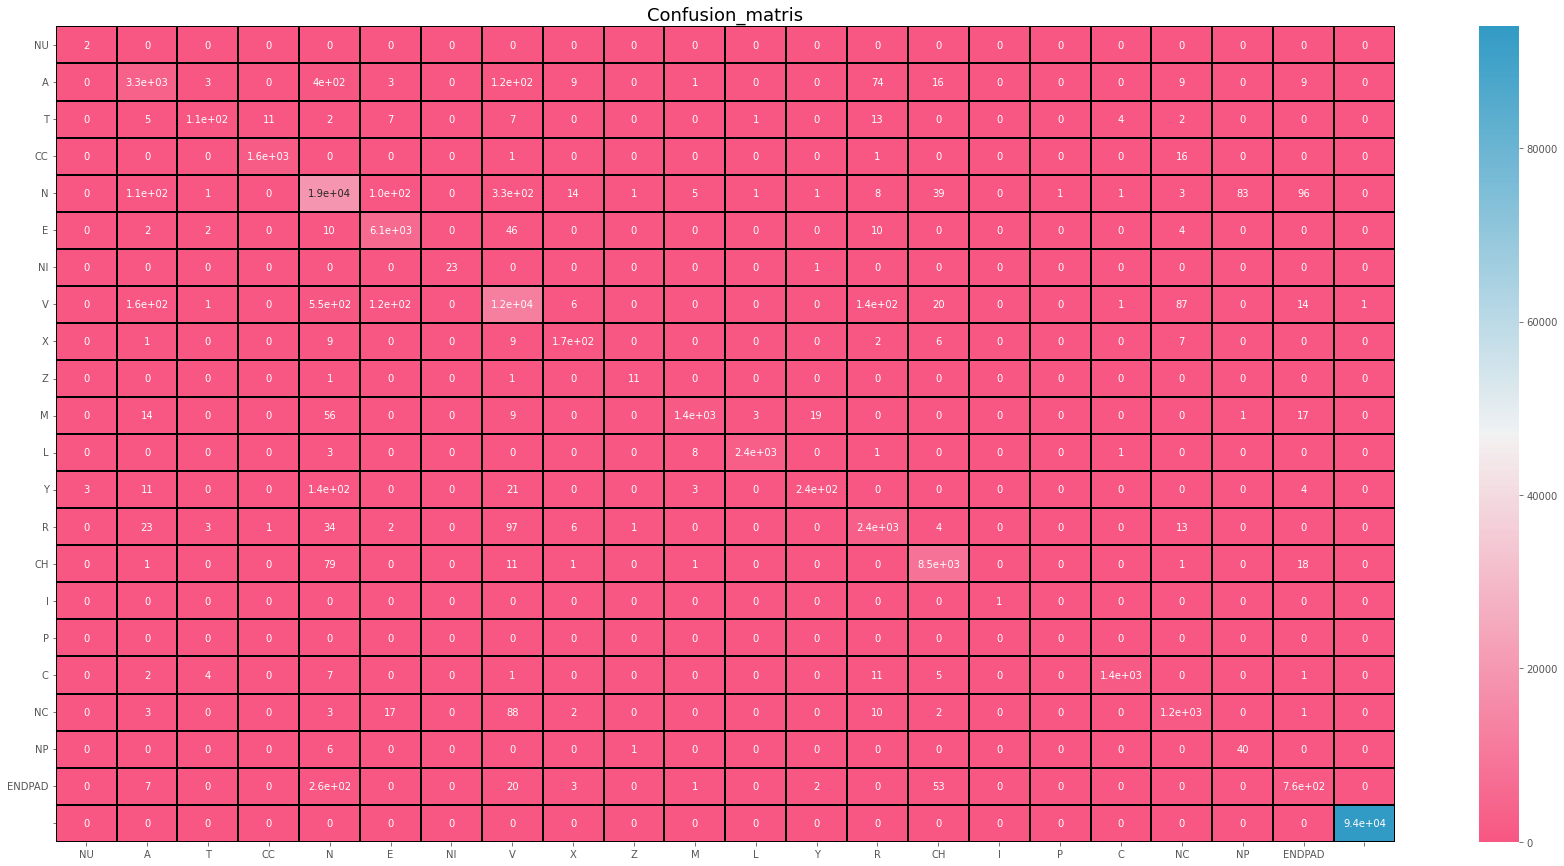

In [ ]:
Matrix(X_bidirect,y_bidirect)

In [ ]:
Measure(X_bidirect,y_bidirect)

Độ đo f1 trên toàn bộ tập dữ liêu:
Micro :  0.9759308176100628
Macro :  0.8327778545188551
              precision    recall  f1-score   support

          Nu       0.40      1.00      0.57         2
           A       0.91      0.84      0.87      3960
           T       0.89      0.68      0.77       163
          Cc       0.99      0.99      0.99      1661
           N       0.93      0.96      0.94     20011
           E       0.96      0.99      0.97      6144
          Ni       1.00      0.96      0.98        24
           V       0.94      0.92      0.93     13324
           X       0.80      0.83      0.82       202
           Z       0.79      0.85      0.81        13
           M       0.99      0.92      0.95      1475
           L       1.00      0.99      1.00      2406
           Y       0.91      0.57      0.70       412
           R       0.90      0.93      0.92      2634
          CH       0.98      0.99      0.99      8609
           I       1.00      1.00      1.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# sort các tags theo index
list_sort= sorted(tag2idx.items(), key=lambda kv: kv[1])
list_labels = []
for i in list_sort:
    list_labels.append(i[0])
acc(X_bidirect,y_bidirect)

Nu:2.5
A:0.9227272727272727
T:0.7668711656441718
Cc:0.9963877182420229
N:1.0371795512468143
E:1.0296223958333333
Ni:0.9583333333333334
V:0.975457820474332
X:1.0346534653465347
Z:1.0769230769230769
M:0.9322033898305084
L:0.9966749792186201
Y:0.6262135922330098
R:1.030751708428246
CH:1.003833197816239
I:1.0
B:0
P:0.9828571428571429
C:1.0116363636363637
Nc:2.6382978723404253
Np:0.8351449275362319
ENDPAD:1.0000106345644615
